# Assignment 1: Transformers & Generative Pretrained Transformer (GPT)

The goal of this assignment is to master the **Transformer architecture**, which is the engine behind modern Large Language Models (LLMs) such as ChatGPT, Gemini, and DeepSeek. We will implement a compact, decoder-only transformer from scratch, closely following the [NanoGPT](https://github.com/karpathy/nanoGPT) project by Andrej Karpathy.

We will train this model on textual figure captions from the [Open-MELON dataset](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K), which contains descriptions of histopathology images (specifically melanocytic lesions). After training, your model will be able to generate **synthetic captions** when prompted with a short starting sequence. Note that at this point we do not associate these captions with image data. We will go into vision-language models that can jointly model both image and text data in the next assignment. For now, we focus on text, but, as you will see in Assignment 2, extending the Transformer architecture to model image data is a straightforward extension. 

This dataset was specifically prepared for this course (work done by Martina Hanusova). While this dataset is certainly not as large as the massive corpora used to train ChatGPT and consists of open-access figures and captions rather than medical images and clinical reports, it offers two  advantages. First, the content is highly dense with relevant medical terminology, which makes the training process efficient. Second, because we are using public data from medical publications, we avoid the complex legal and ethical hurdles associated with handling private patient data.

## Preparation

We start with the assumption that you have a solid understanding of fundamental machine learning and neural network concepts, such as linear regression, gradient descent, backpropagation, and loss functions; if you need a refresher, please review materials from the previous courses (e.g. 8BB020 Introduction to Machine Learning). You must prepare for this assignment by mastering the Transformer architecture, specifically understanding self-attention mechanisms in neural networks and the distinction between encoder models and the decoder-only architectures (like GPT) used for generative tasks.

Beyond the architecture, you must also familiarize yourself with the basics of Computational Pathology to understand the medical context of our dataset (we will be generating captions for H&E stained histopathology images).

This is a list of materials that you can use to learn the topic of Transformers and prepare for the flipped classrooms:

| Type | Length | Link | Why is it relevant? |
| :--- | :--- | :--- | :--- |
| Video | 8 min. | [Large Language Models explained briefly (3Blue1Brown)](https://www.youtube.com/watch?v=LPZh9BOjkQs&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5) | This video from the [3Blue1Brown](https://www.3blue1brown.com/) YouTube channel was originally made as an exhibit for Computer History Museum. It gives a very "gentle" and high-level introduction of the mechanics of how (large) language models work and are trained. This includes the concept of autoregressive modelling (predicting the next word in a sequence), (pre)-training of large language models from text datasets (the "P" in GPT stands for "pretrained") as well as reinforcement learning with human feedback. While in this course we will keep to training of (relatively small) language models, it is good to have the complete picture.  The entire 3Blue1Brown channel is a very high-quality source of educational content on a wide range of topics. In fact, the entire [Neural networks]() playlist is highly recommended, also as a refresher to more fundamental concepts such as backpropagation. | 
| Paper | 10 pg. | [Attention Is All You Need (Vaswani et al.)](https://arxiv.org/abs/1706.03762) | This is the paper that introduced the Transformer architecture to the world. It is a must-read for anyone interested in the subject. The paper is relatively short (10 pages without references), however it can be a bit "dense" for beginners. That is ok, as the most important thing to understand is the tokenization of text and the self-attention mechanism. Both of these concepts are also covered in the next two recommended videos so it is best that you iterate between watching the videos and reading the paper. Note that one thing that might be particularly confusing is that the neural network architecture in this paper has both an encoder and decoder part. This is because the application that is addressed here is natural language translation (machine translation). In this setup, the encoder part is used to encode the text in the original language and the decoder is used to translate this encoded text into the target language. In this course we will focus on decoder-only architectures, which are used for generative tasks such as text generation. | 
| Video | 27 min. | [Transformers, the tech behind LLMs (3Blue1Brown)](https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) | This video provides a visual overview of the data flow within a Transformer, specifically focusing on GPT-style (decoder-only) models. It explains tokenization, embeddings (how vectors encode semantic meaning), and the final softmax layer used to predict the next token. It serves as a high-level roadmap of the architecture before diving into specific components in the next video. |
| Video | 26 min. | [Attention in transformers (3Blue1Brown)](https://www.youtube.com/watch?v=eMlx5fFNoYc&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) |This chapter breaks down the Attention mechanism (Self-Attention), which is the core innovation of the Transformer. It details the Query, Key, and Value (Q, K, V) matrices and visualizes how the attention pattern is calculated via dot products. It explains how the model uses these to "attend" to relevant context (updating word meanings based on surrounding words) and introduces concepts like multi-head attention and masking. |
| Interactive tool | ~25 min. | [Transformer explainer (poloclub)](https://poloclub.github.io/transformer-explainer/)| This is a great interactive tool that explains in steps how transformer models for language work and make predictions. It should take around 25 minutes to go over all the steps in the tool for one example, but it might be useful to spend some more time and look at different examples. | 
| Video | 120 min. | [Let's build GPT: from scratch, in code, spelled out (Andrej Karpathy)](https://www.youtube.com/watch?v=kCc8FmEb1nY) | This video series provides a step-by-step guide to building a GPT-style transformer from scratch. It covers the entire process, from data preparation to model training and evaluation. It is a great resource for understanding the mechanics of how GPT-style models work and how to implement them in code. It is **optional** in a sense that it is not required for the exercises, but might be very useful for understanding the dataset and **formulating an research question for the open assignment.** |
| Paper | 11 pg. | [From melanocytes to melanomas (Shain et al.)](https://www.nature.com/articles/nrc.2016.37) | This review paper provides a good overview of the biology of melanocytic lesions and the histopathology of melanocytic lesions. It is a good resource to understand the medical context of our dataset.|
| Paper | 35 pg. | [Large Language Models: A Survey (Minaee et al.)](https://arxiv.org/abs/2402.06196) | This survey paper is a good resource to get the "big picture" of various large language models and how they differ in their methodology and implementation. Treat this resource as **optional**. It is not required to complete the exercises in this assignments, but it is very useful to get a broader understanding of the state-of-the-art, which you might find useful for **generating ideas for the open assignment** or future projects (e.g. for your BEP or MSc projects). |

## Exercises: Theory

⚠️ *The answers to the theory exercises are NOT to be submitted as part of the assignment deliverables. They can, however, be used to check your understanding of the materials and to prepare for the flipped classroom. You CAN include your discussion about the exercises in the flipped classroom log.*

#### Exercise T.1 

A GPT model is autoregressive, meaning it generates text strictly one token at a time. It predicts the first next token, appends it to the sequence, and uses that updated sequence to predict the second token. This is a serial process.

In contrast, many other neural networks process their entire input in parallel (all at once) to maximize speed.

If we modified the architecture to predict every token in a paragraph simultaneously (in parallel) rather than one by one, is the resulting text likely to be grammatically coherent? Explain your reasoning.

#### Exercise T.2

In this assignment (as you will see later), we define tokens to be individual characters (e.g., 'a', 'b', 'c'). This keeps our vocabulary small and the implementation simple. In contrast, the standard practice for modern Large Language Models is to use sub-word tokenization, which groups frequent character patterns into single tokens to process text more efficiently. 

Assume that we take this concept one step further and define tokens to be entire sentences. What would be the consequence of this when generating text?

#### Exercise T.3

The core concept of a Transformer is self-attention, which allows a token to look at other tokens to gather context. In a Decoder-only model (like GPT), we apply a specific constraint called Causal Self-Attention (or "Masked" Self-Attention) during training. This forces every token to look only at itself and the tokens that came before it.

This is different from Encoder models, which use Bidirectional Attention, allowing tokens to see the entire sentence (past and future) at once.

Assume that during training, we feed the entire completed sentence into the model at once. Will this model still be useful for generating text? Explain your reasoning. 

#### Exercise T.4 

Decoder-only models (like GPT) are mathematically optimized to maximize the probability of the text sequence. This means that if they were trained with medical report data, they strive to generate text that "looks" and "sounds" like a real medical report. They are not optimized to check for factual truth.

Assume that your trained model generates a synthetic pathology caption that includes specific quantitative details: "The sample shows a high mitotic rate of 8 figures per 10 HPF."

Why is this specific type of error (a plausible-sounding number) significantly more dangerous to a clinician than if the model had just generated obvious gibberish (e.g., "rate figures high 8 10" )?

#### Exercise T.5 

If we want to train a model that generates a pathology report based on medical imaging data, we would need a joint vision-language model. We will touch on this in the next assignment. For now, assume that we want to generate a report based on some medical test or observations that we can represent as text data and make them part of the starting sequence that we use to prompt further generation.

Consider the following example of how such a model would operate:

Input Sequence (Provided by User): "Clinical Indication: Patient has a rapidly growing, asymmetrical black lesion on the left shoulder. Rule out Melanoma. Gross Description: ..."

Generated Continuation (Predicted by Model): "...Specimen consists of a skin ellipse measuring 2.0 x 1.5 cm. Microscopic examination reveals a proliferation of atypical melanocytes arranged in nests at the dermo-epidermal junction. There is upward migration of cells (pagetoid spread). DIAGNOSIS: MALIGNANT MELANOMA."

Would such a model be useful in clinical practice? Motivate your answer.


## Before you Begin...

### Dataset

[Open-MELON-VL-2.5K](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K) is a vision–language dataset of 2,500 Hematoxylin & Eosin-stained histopathology images of melanocytic lesions with captions, curated from PubMed open-access publications. It is hosted on Hugging Face, which is a platform for sharing and accessing datasets.

### GPU Usage

For the assignments, we recommend to use GPU for faster model training or evaluation.
[Google Colab](https://colab.research.google.com) provides a free service for hosting Jupyter notebooks allowing to access a remote Tesla T4 GPU.
Please keep in mind the Colab free tier GPU usage limits (approximately 1.5 hours per day, but may be higher or lower depending on your usage history).

To enable a GPU in Colab, navigate to the menu panel -> `Runtime` -> `Change runtime type` -> `T4 GPU` -> `Save`.
When you are done with your work, detach the current runtime session and download the Jupyter notebook file locally.

⚠️ *Note that all assignments are designed to also be doable on the CPUs of your laptops, so you do not have to use Colab or a GPU.* 

## Training a Generative Language Model

### Install Required Packages

This notebook uses:
- `numpy` for basic math operations
- `datasets` to load captions from Hugging Face
- PyTorch to implement NanoGPT-like model + training loop
- `tqdm` for displaying progress bars

All other used packages should already be available on your system. If you need help with setting up your Python environment, please ask help from your assigned TA.

Let's install the required packages:

In [11]:
!pip install numpy datasets torch tqdm

### Import the Libraries

The following Python modules will be used for our NanoGPT implementation.

In [60]:
import os
import math
import random
from dataclasses import dataclass
from typing import List, Tuple

import numpy as np

from datasets import load_dataset, concatenate_datasets

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.auto import tqdm

import matplotlib.pyplot as plt

### Check local GPU is available 

Use GPU if available 

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # Windows/Linux
    print("gpuuuuuuuuu")

elif torch.backends.mps.is_available():
    device = torch.device("mps")  # MacOS
else:
    device = torch.device("cpu")
    print("cpuuuuu")

gpuuuuuuuuu


### Check what PyTorch thinks I installed

In [4]:
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("torch.version.cuda:", torch.version.cuda)


torch: 2.5.1
cuda available: True
torch.version.cuda: 12.1


### How to enable GPU (CUDA) in this environment (only if cpuuuuuu and torch.version.cuda: None are printed above)
Enable GPU (CUDA) for PyTorch on Windows (Conda env)

1. Open Anaconda Prompt (or terminal) and activate the your environment:

conda activate (your created enviroment)

2. Remove any CPU-only PyTorch packages:

pip uninstall -y torch torchvision torchaudio


3. Install CUDA-enabled PyTorch:

conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia


4. Restart the Jupyter VS Code notebook kernel
This is important — otherwise the notebook may still use the old install.

5. Verify CUDA works (run the check cells above).
You should see:

gpuuuuuuuuu
cuda available: True
torch.version.cuda: 12.1 (or other version)

### Load the Dataset

In the code block below, [Open-MELON dataset](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K) is loaded using HuggingFace loaders and the figure captions are concatenated into one big training corpus.


In [66]:
# ds_dict is a list of ['train', 'validation', 'test'] splits
ds_dict = load_dataset("MartiHan/Open-MELON-VL-2.5K")

# in this example, all 3 splits are concatenated
# validation set is later drawn from the text chunks of 'block_size'
ds_all = concatenate_datasets(list(ds_dict.values()))

captions = [str(x) for x in ds_all["caption"]]
print("Captions:", len(captions))
print("Example caption:", captions[0])


Captions: 2499
Example caption: Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.


#### Preprocess the Training Text

We join separate captions with `<ENDC>` separator. This helps the model learn boundaries.


In [67]:
SEP = "\n<ENDC>\n"
text = SEP.join(captions)

# Check
print("Using <ENDC> separator:", "<ENDC>" in text)

# Print the total number of characters in the dataset
print("Training text length (chars):", len(text))

# Print the first 1000 characters of the constructed text corpus
print(text[:1000])

Using <ENDC> separator: True
Training text length (chars): 971654
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
<ENDC>
Histopathology of small bowel polyps showing malignant cells arranged in diffuse sheets with the presence of intracytoplasmic and extracellular pigments. The image is stained with hematoxylin and eosin (H&E) at × 20 magnification.
<ENDC>
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
<ENDC>
Histopathology showing spindle cell uveal melanoma from a left eye choroidal pigmented malignant melanoma, classified as invasive in the ciliary body and cornea (stage IIIB, pT4bN0M0). The microscopic examination reveals a dense cell proliferation composed of small and medium fusiform (spindle) cells, along with evident pigment production. The tissue f

### Exercise 1: Training without `<ENDC>` separator

Run the cell below **instead of** the `<ENDC>` corpus cell above to train a model without explicit caption boundary tokens.


In [59]:
# Exercise 1: NO <ENDC> separator

# Join captions WITHOUT the <ENDC> marker
text = "\n".join(captions)

# Check
print("Using <ENDC> separator:", "<ENDC>" in text)

# Print the total number of characters in the dataset
print("Training text length (chars):", len(text))

# Print the first 1000 characters of the constructed text corpus
print(text[:1000])

Using <ENDC> separator: False
Training text length (chars): 954168
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
Histopathology of small bowel polyps showing malignant cells arranged in diffuse sheets with the presence of intracytoplasmic and extracellular pigments. The image is stained with hematoxylin and eosin (H&E) at × 20 magnification.
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
Histopathology showing spindle cell uveal melanoma from a left eye choroidal pigmented malignant melanoma, classified as invasive in the ciliary body and cornea (stage IIIB, pT4bN0M0). The microscopic examination reveals a dense cell proliferation composed of small and medium fusiform (spindle) cells, along with evident pigment production. The tissue fragments were embedd

### Exercise 3: Case normalization

Run **one** of the two cells below to convert the corpus to:
- all lowercase, or
- all uppercase.



In [63]:
# Exercise 3: Lowercase corpus

SEP = "\n<ENDC>\n"
text = SEP.join(captions)

# Convert entire corpus to lowercase
text = text.lower()

print("Corpus converted to lowercase.")
print("Using <ENDC> separator:", "<endc>" in text)
print("Training text length (chars):", len(text))
print("First 1000 characters:\n")
print(text[:1000])

Corpus converted to lowercase.
Using <ENDC> separator: True
Training text length (chars): 971654
First 1000 characters:

small bowel polyps showing malignant cells located at the lamina propria and submucosa. the image is stained with hematoxylin and eosin (h&e) at × 4 magnification.
<endc>
histopathology of small bowel polyps showing malignant cells arranged in diffuse sheets with the presence of intracytoplasmic and extracellular pigments. the image is stained with hematoxylin and eosin (h&e) at × 20 magnification.
<endc>
small bowel polyps showing malignant cells located at the lamina propria and submucosa. the image is stained with hematoxylin and eosin (h&e) at × 4 magnification.
<endc>
histopathology showing spindle cell uveal melanoma from a left eye choroidal pigmented malignant melanoma, classified as invasive in the ciliary body and cornea (stage iiib, pt4bn0m0). the microscopic examination reveals a dense cell proliferation composed of small and medium fusiform (spindle) cel

In [68]:
# Exercise 3: Uppercase corpus

SEP = "\n<ENDC>\n"
text = SEP.join(captions)

# Convert entire corpus to uppercase
text = text.upper()

print("Corpus converted to uppercase.")
print("Using <ENDC> separator:", "<ENDC>" in text)
print("Training text length (chars):", len(text))
print("First 1000 characters:\n")
print(text[:1000])

Corpus converted to uppercase.
Using <ENDC> separator: True
Training text length (chars): 971654
First 1000 characters:

SMALL BOWEL POLYPS SHOWING MALIGNANT CELLS LOCATED AT THE LAMINA PROPRIA AND SUBMUCOSA. THE IMAGE IS STAINED WITH HEMATOXYLIN AND EOSIN (H&E) AT × 4 MAGNIFICATION.
<ENDC>
HISTOPATHOLOGY OF SMALL BOWEL POLYPS SHOWING MALIGNANT CELLS ARRANGED IN DIFFUSE SHEETS WITH THE PRESENCE OF INTRACYTOPLASMIC AND EXTRACELLULAR PIGMENTS. THE IMAGE IS STAINED WITH HEMATOXYLIN AND EOSIN (H&E) AT × 20 MAGNIFICATION.
<ENDC>
SMALL BOWEL POLYPS SHOWING MALIGNANT CELLS LOCATED AT THE LAMINA PROPRIA AND SUBMUCOSA. THE IMAGE IS STAINED WITH HEMATOXYLIN AND EOSIN (H&E) AT × 4 MAGNIFICATION.
<ENDC>
HISTOPATHOLOGY SHOWING SPINDLE CELL UVEAL MELANOMA FROM A LEFT EYE CHOROIDAL PIGMENTED MALIGNANT MELANOMA, CLASSIFIED AS INVASIVE IN THE CILIARY BODY AND CORNEA (STAGE IIIB, PT4BN0M0). THE MICROSCOPIC EXAMINATION REVEALS A DENSE CELL PROLIFERATION COMPOSED OF SMALL AND MEDIUM FUSIFORM (SPINDLE) CEL

### Character-level Tokenizer

We build a vocabulary of unique characters from the training text. 


In [69]:
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping of characters to numerical tokens (by their order in vocabulary alphabet)
stoi = {ch:i for i,ch in enumerate(chars)}

# mapping of numerical tokens back to characters
itos = {i:ch for i,ch in enumerate(chars)}

def encode(s: str):
    """
    Converts character to a token.
    Input: character (e.g. 'A')
    Output: numerical token (e.g. 65)
    """
    return [stoi[c] for c in s]

def decode(ids):
    """
    Converts token to a character.
    Input: numerical token (e.g. 65)
    Output: character (e.g. 'A')
    """
    return "".join(itos[i] for i in ids)

Let's print some information about the vocabulary that we have created as well as some examples of encoding words. 

In [70]:
print("Size of the vocabulary:", vocab_size)
print("Preview of the vocabulary:", chars)

examples = ["male", "malignant", "melanoma", "malignant melanoma"]

print("\n--- Encoding Examples ---")

for word in examples:
    tokens = encode(word)
    
    # Create a visual mapping of Char -> Token
    mapping_str = ", ".join([f"'{c}':{t}" for c, t in zip(word, tokens)])
    
    print(f"String:  {word}")
    print(f"Tokens:  {tokens}")
    print(f"Mapping: {mapping_str}")
    print("-" * 40)


Size of the vocabulary: 82
Preview of the vocabulary: ['\n', ' ', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '\xa0', '§', '°', '±', '²', '´', 'Í', '×', 'Α', 'Μ', '\u2005', '\u2009', '‐', '–', '‘', '’', '“', '”', '→', '⇒', '≤', '≥', '⊷']

--- Encoding Examples ---


KeyError: 'm'

### Exercise 3: Upper/Lower

Let's print some information about the vocabulary that we have created as well as some examples of encoding words. 

In [71]:
print("Size of the vocabulary:", vocab_size)
print("Preview of the vocabulary:", chars)

examples = ["male", "malignant", "melanoma", "malignant melanoma"]

# Adapt examples to match corpus case
if text.isupper():
    examples = [w.upper() for w in examples]
elif text.islower():
    examples = [w.lower() for w in examples]

print("\n--- Encoding Examples ---")

for word in examples:
    tokens = encode(word)
    mapping_str = ", ".join([f"'{c}':{t}" for c, t in zip(word, tokens)])
    
    print(f"String:  {word}")
    print(f"Tokens:  {tokens}")
    print(f"Mapping: {mapping_str}")
    print("-" * 40)

Size of the vocabulary: 82
Preview of the vocabulary: ['\n', ' ', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '\xa0', '§', '°', '±', '²', '´', 'Í', '×', 'Α', 'Μ', '\u2005', '\u2009', '‐', '–', '‘', '’', '“', '”', '→', '⇒', '≤', '≥', '⊷']

--- Encoding Examples ---
String:  MALE
Tokens:  [42, 30, 41, 34]
Mapping: 'M':42, 'A':30, 'L':41, 'E':34
----------------------------------------
String:  MALIGNANT
Tokens:  [42, 30, 41, 38, 36, 43, 30, 43, 49]
Mapping: 'M':42, 'A':30, 'L':41, 'I':38, 'G':36, 'N':43, 'A':30, 'N':43, 'T':49
----------------------------------------
String:  MELANOMA
Tokens:  [42, 34, 41, 30, 43, 44, 42, 30]
Mapping: 'M':42, 'E':34, 'L':41, 'A':30, 'N':43, 'O':44, 'M':42, 'A':30
----------------------------------------
String:  MALIG

Now we encode the text corpus and store it as PyTorch array. The first 90% of this array will be used for training, while the remaining 10% will be used for validation.

In [45]:

data = torch.tensor(encode(text), dtype=torch.long)

n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split: str):
    src = train_data if split == "train" else val_data
    ix = torch.randint(len(src) - cfg.block_size - 1, (cfg.batch_size,))
    x = torch.stack([src[i:i+cfg.block_size] for i in ix])
    y = torch.stack([src[i+1:i+cfg.block_size+1] for i in ix])
    return x.to(cfg.device), y.to(cfg.device)

print("Train tokens:", train_data.numel(), "Val tokens:", val_data.numel())

Train tokens: 858751 Val tokens: 95417


### Model Training Configurations

The following configuration classes define the size of the transformer model and how it is trained. These hyperparameters control model capacity, context length, training stability, and computational cost. You can later use this to perform different experiments, e.g. comparing models of different size (capacity) and context length. 

**Model configuration**

- `vocab_size` - number of unique tokens the model can process. In this assignment, tokens are individual characters, so the vocabulary size equals the number of distinct characters in the training corpus.

- `block_size` - the context window length, i.e. the maximum number of tokens the model can see at once. During training and generation, the model predicts the next token using only the previous block_size tokens. A larger block size allows the model to capture longer-range dependencies but increases memory and computation requirements.

- `n_layer` - number of stacked transformer decoder blocks. More layers increase model depth and expressiveness but also training time and risk of overfitting.

- `n_head` - number of attention heads in each self-attention layer. Multiple heads allow the model to attend to different aspects of the context simultaneously (e.g. syntax, formatting, or local patterns).

- `n_embd` - dimensionality of token embeddings and hidden representations. Larger embeddings allow richer representations but increase memory usage and compute cost.

- `dropout` - dropout probability used during training as a regularization technique. It helps prevent overfitting by randomly deactivating neurons. Dropout is disabled for CPU training to keep behavior deterministic and training stable.

**Training configuration**
- `batch_size` - Number of training sequences processed in parallel during one optimization step. Larger batches improve gradient stability but require more memory.

- `max_iters` - total number of training iterations (parameter update steps).

- `eval_interval` - number of training iterations between evaluations on the validation set.

- `eval_iters` - number of mini-batches used to estimate training and validation loss during evaluation.

- `lr (learning rate)` - step size used by the optimizer when updating model parameters. This is one of the most sensitive hyperparameters for training stability.

- `weight_decay` - regularization term that penalizes large weights and helps reduce overfitting.

- `device` - specifies whether training runs on CPU or GPU. Smaller model and batch sizes are used automatically when no GPU is available.


In [46]:
##############################################################################################
### Model configuration (number of layers, number of heads, embedding dimensions, dropout) ###
##############################################################################################

# Configuration for GPU
@dataclass
class ModelConfigGPU:
    vocab_size: int
    block_size: int
    n_layer: int = 4
    n_head: int = 4
    n_embd: int = 256
    dropout: float = 0.2

# Configuration for CPU
@dataclass
class ModelConfigCPU:
    vocab_size: int
    block_size: int
    n_layer: int = 4
    n_head: int = 4
    n_embd: int = 128
    dropout: float = 0

########################################################################################################
### Model configuration (block size, batch size, evaluation iterations, learning rate, weight decay) ###
########################################################################################################

# Configuration for GPU
@dataclass
class TrainConfigGPU:
    block_size: int = 256
    batch_size: int = 64
    max_iters: int = 2000
    eval_interval: int = 250
    eval_iters: int = 200
    lr: float = 1e-3
    weight_decay: float = 0.1
    device: str = "cuda"

# Configuration for CPU
@dataclass
class TrainConfigCPU:
    block_size: int = 64
    batch_size: int = 12
    max_iters: int = 2000
    eval_interval: int = 200
    eval_iters: int = 50
    lr: float = 1e-3
    weight_decay: float = 0.1
    device: str = "cpu"
    compile: bool = False


# Automatically select suitable configuration based on GPU detection
if torch.cuda.is_available():
  ModelConfig = ModelConfigGPU
  TrainConfig = TrainConfigGPU
else:
  ModelConfig = ModelConfigCPU
  TrainConfig = TrainConfigCPU


### Building the NanoGPT Model

The model begins with token embeddings, which map character indices to dense vectors, and positional embeddings, which encode the order of tokens within a fixed context window (`block_size`). These embeddings are added together and passed through a stack of transformer decoder blocks.

Each decoder block consists of two main submodules: causal self-attention and a feed-forward network (MLP). Causal self-attention allows each token to attend only to previous tokens by applying a causal mask, ensuring that the model cannot access future information during training or generation. Multiple attention heads are used so that the model can focus on different aspects of the context in parallel. The MLP applies a non-linear transformation independently at each position, complementing the attention mechanism. Layer normalization and residual connections are used throughout to stabilize training and preserve information flow.


In [47]:
class CausalSelfAttention(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        assert c.n_embd % c.n_head == 0
        self.n_head = c.n_head
        self.head_dim = c.n_embd // c.n_head

        self.qkv = nn.Linear(c.n_embd, 3 * c.n_embd, bias=False)
        self.proj = nn.Linear(c.n_embd, c.n_embd, bias=False)
        self.dropout = nn.Dropout(c.dropout)

        mask = torch.tril(torch.ones(c.block_size, c.block_size)).view(1, 1, c.block_size, c.block_size)
        self.register_buffer("mask", mask)

    def forward(self, x):
        B, T, C = x.shape
        qkv = self.qkv(x)
        q, k, v = qkv.split(C, dim=2)

        q = q.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        k = k.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        v = v.view(B, T, self.n_head, self.head_dim).transpose(1, 2)

        att = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim)
        att = att.masked_fill(self.mask[:, :, :T, :T] == 0, float("-inf"))
        att = F.softmax(att, dim=-1)
        att = self.dropout(att)

        y = att @ v
        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.proj(y)
        y = self.dropout(y)
        return y

class MLP(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.fc = nn.Linear(c.n_embd, 4 * c.n_embd)
        self.proj = nn.Linear(4 * c.n_embd, c.n_embd)
        self.dropout = nn.Dropout(c.dropout)

    def forward(self, x):
        x = self.fc(x)
        x = F.gelu(x)
        x = self.proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.ln1 = nn.LayerNorm(c.n_embd)
        self.attn = CausalSelfAttention(c)
        self.ln2 = nn.LayerNorm(c.n_embd)
        self.mlp = MLP(c)

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

After passing through all decoder blocks, the model applies a final layer normalization and a linear output head that produces a probability distribution over the vocabulary for the next-token prediction. The training objective is standard cross-entropy loss between the predicted next token and the true next token.

This NanoGPT model contains approximately between 0.8 and 3 million parameters, depending on the configuration. By comparison, GPT-2 contains hundreds of millions of parameters and modern commercial language models contain many billion parameters. Despite this difference in scale, the same architectural principles apply. The total number of parameters is mainly determined by the embedding dimension (`n_embd`), the number of layers (`n_layer`), and the vocabulary size, while the number of attention heads controls how the embedding space is partitioned rather than its overall size.

The model is intentionally kept small so that it can be trained quickly on limited hardware and easily inspected. The goal of this assignment is to understand how transformer components interact, not to achieve state-of-the-art language modeling performance.

In [48]:
class NanoGPT(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.c = c
        self.tok_emb = nn.Embedding(c.vocab_size, c.n_embd)
        self.pos_emb = nn.Embedding(c.block_size, c.n_embd)
        self.drop = nn.Dropout(c.dropout)
        self.blocks = nn.ModuleList([Block(c) for _ in range(c.n_layer)])
        self.ln_f = nn.LayerNorm(c.n_embd)
        self.head = nn.Linear(c.n_embd, c.vocab_size, bias=False)

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, (nn.Linear, nn.Embedding)):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
        if isinstance(module, nn.Linear) and module.bias is not None:
            nn.init.zeros_(module.bias)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        assert T <= self.c.block_size
        pos = torch.arange(0, T, device=idx.device).unsqueeze(0)

        x = self.tok_emb(idx) + self.pos_emb(pos)
        x = self.drop(x)
        for blk in self.blocks:
            x = blk(x)
        x = self.ln_f(x)
        logits = self.head(x)

        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss

cfg = TrainConfig()
mcfg = ModelConfig(vocab_size=vocab_size, block_size=cfg.block_size)

model = NanoGPT(mcfg).to(cfg.device)
print("Parameters:", sum(p.numel() for p in model.parameters())/1e6, "M")


Parameters: 3.2768 M


### The Training Loop

We use the AdamW optimizer and periodically evaluate on the validation set. The training in Google Colab should take for both the CPU and GPU configurations approximately 4-5 minutes using the baseline configuration.

In [49]:
@torch.no_grad()
def estimate_loss():
    model.eval()
    out = {}
    for split in ["train", "val"]:
        losses = torch.zeros(cfg.eval_iters)
        for k in range(cfg.eval_iters):
            X, Y = get_batch(split)
            _, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean().item()
    model.train()
    return out

optimizer = torch.optim.AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

model.train()
pbar = tqdm(range(cfg.max_iters), desc="training")
for it in pbar:
    if it % cfg.eval_interval == 0:
        losses = estimate_loss()
        pbar.set_postfix(train=losses["train"], val=losses["val"])

    xb, yb = get_batch("train")
    _, loss = model(xb, yb)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


training: 100%|██████████| 2000/2000 [10:52<00:00,  3.07it/s, train=0.723, val=0.892]  


### Exercise 2: Hyperparameter experiments

The following cells retrain the model multiple times while varying:
- Learning rate
- Batch size
- Evaluation interval

Run only one experiment cell at a time.

In [22]:
def run_training_and_collect():
    # fresh model each run
    mcfg_local = ModelConfig(vocab_size=vocab_size, block_size=cfg.block_size)
    model_local = NanoGPT(mcfg_local).to(cfg.device)

    optimizer = torch.optim.AdamW(
        model_local.parameters(),
        lr=cfg.lr,
        weight_decay=cfg.weight_decay
    )

    @torch.no_grad()
    def estimate_loss_local():
        model_local.eval()
        out = {}
        for split in ["train", "val"]:
            losses = torch.zeros(cfg.eval_iters)
            for k in range(cfg.eval_iters):
                X, Y = get_batch(split)
                _, loss = model_local(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean().item()
        model_local.train()
        return out

    eval_steps = []
    train_curve = []
    val_curve = []

    model_local.train()
    for it in tqdm(range(cfg.max_iters), desc=f"training (lr={cfg.lr}, bs={cfg.batch_size}, eval_int={cfg.eval_interval})"):
        if it % cfg.eval_interval == 0:
            losses = estimate_loss_local()
            eval_steps.append(it)
            train_curve.append(losses["train"])
            val_curve.append(losses["val"])

        xb, yb = get_batch("train")
        _, loss = model_local(xb, yb)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    return eval_steps, train_curve, val_curve

### Exercise 2a: Vary learning rate

training (lr=0.003, bs=64, eval_int=250): 100%|██████████| 2000/2000 [10:53<00:00,  3.06it/s]  


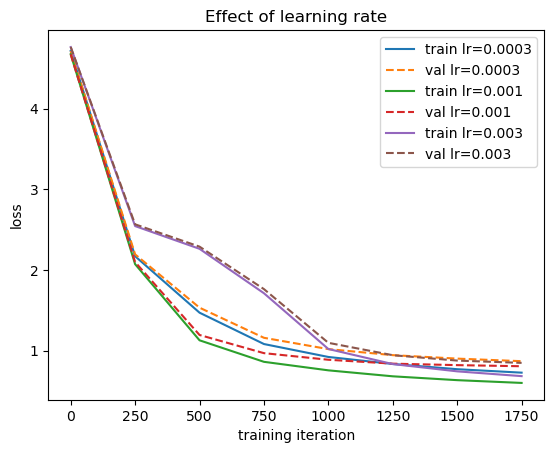

In [23]:
learning_rates = [3e-4, 1e-3, 3e-3]
orig_lr = cfg.lr

plt.figure()

for lr in learning_rates:
    cfg.lr = lr
    eval_steps, train_curve, val_curve = run_training_and_collect()

    plt.plot(eval_steps, train_curve, label=f"train lr={lr}")
    plt.plot(eval_steps, val_curve, linestyle="--", label=f"val lr={lr}")

cfg.lr = orig_lr

plt.xlabel("training iteration")
plt.ylabel("loss")
plt.legend()
plt.title("Effect of learning rate")
plt.show()

### Exercise 2b: Vary batch size

training (lr=0.001, bs=64, eval_int=250): 100%|██████████| 2000/2000 [10:54<00:00,  3.06it/s]  


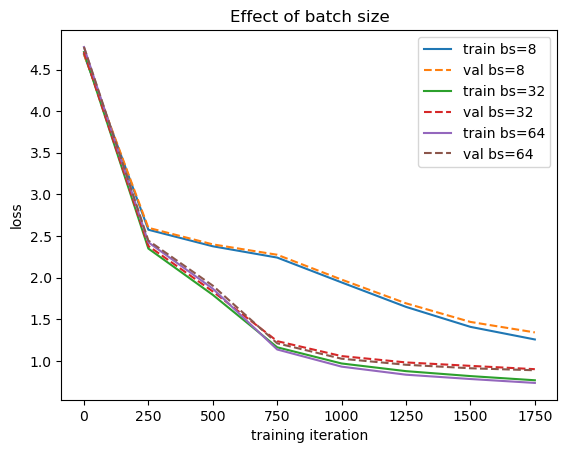

In [24]:
batch_sizes = [8, 32, 64]
orig_bs = cfg.batch_size

plt.figure()

for bs in batch_sizes:
    cfg.batch_size = bs
    eval_steps, train_curve, val_curve = run_training_and_collect()

    plt.plot(eval_steps, train_curve, label=f"train bs={bs}")
    plt.plot(eval_steps, val_curve, linestyle="--", label=f"val bs={bs}")

cfg.batch_size = orig_bs

plt.xlabel("training iteration")
plt.ylabel("loss")
plt.legend()
plt.title("Effect of batch size")
plt.show()

### Exercise 2c: Vary evaluation interval

training (lr=0.001, bs=64, eval_int=500): 100%|██████████| 2000/2000 [08:57<00:00,  3.72it/s]  


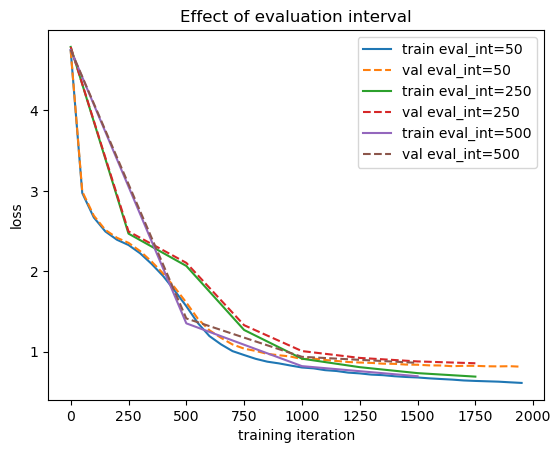

In [25]:
eval_intervals = [50, 250, 500]
orig_ei = cfg.eval_interval

plt.figure()

for ei in eval_intervals:
    cfg.eval_interval = ei
    eval_steps, train_curve, val_curve = run_training_and_collect()

    plt.plot(eval_steps, train_curve, label=f"train eval_int={ei}")
    plt.plot(eval_steps, val_curve, linestyle="--", label=f"val eval_int={ei}")

cfg.eval_interval = orig_ei

plt.xlabel("training iteration")
plt.ylabel("loss")
plt.legend()
plt.title("Effect of evaluation interval")
plt.show()

### Text Generation (Sampling)

Now that the model is trained we can put it to use. We generate the synthetic captions starting from `"H&E stained section showing"` string by autoregressively sampling next characters

Hyperparameters:
- `temperature`: higher = more random, lower = less variety
- `top_k`: restrict sampling to top-k most likely chars (lower number eliminates less likely candidates)

In [50]:
@torch.no_grad()
def generate(start: str, max_new_tokens=400, temperature=1.0, top_k=60):
    model.eval()
    idx = torch.tensor([encode(start)], dtype=torch.long, device=cfg.device)

    for _ in range(max_new_tokens):
        idx_cond = idx[:, -cfg.block_size:]
        logits, _ = model(idx_cond)
        logits = logits[:, -1, :] / max(temperature, 1e-6)

        if top_k is not None:
            v, _ = torch.topk(logits, k=min(top_k, logits.size(-1)))
            logits[logits < v[:, [-1]]] = -float("Inf")

        probs = F.softmax(logits, dim=-1)
        next_id = torch.multinomial(probs, num_samples=1)
        idx = torch.cat([idx, next_id], dim=1)

    return decode(idx[0].tolist())

prompt = "H&E stained section showing"

print(generate(prompt, max_new_tokens=500, temperature=0.7, top_k=10))


H&E stained section showing a distinct nucleoli, or sen, rounded by a melanophages. The image is stained with Hematoxylin and Eosin (H&E) and captured at ×10 magnification, showing a dermal atypia, stained with Hematoxylin and Eosin (H&E) at ×20 magnification.
Histopathology of a melanocytes with a higher magnification (H&E stain, ×400 magnification) showing a nests of moderately pleomorphic nuclei, and spindle-shaped cells and numerous cells and melanocytes and adjacent to spindle-shaped melanoma is observed. The image d


### Exercise 5: Sampling sweep (temperature × top_k)

In this cell we generate captions using at least three different temperature values and two different top_k values.
For each configuration we generate 10 examples to compare fluency, repetition/degeneration, and plausibility.

In [40]:
# Exercise 5: Sampling hyperparameters

temperatures = [0.3, 0.7, 1.5]   
top_ks = [10, 60]                 
n_examples = 10

prompt = "H&E stained section showing"

for temperature in temperatures:
    for top_k in top_ks:

        print("\n" + "="*90)
        print(f"temperature = {temperature} | top_k = {top_k}")
        print("="*90)

        for i in range(n_examples):
            print(f"\n--- Example {i+1} ---")
            print(generate(prompt, max_new_tokens=500, temperature=temperature, top_k=top_k))


temperature = 0.3 | top_k = 10

--- Example 1 ---
H&E stained section showing a compound melanocytic nevus with mild atypia, and prominent nucleoli, and melanin pigment in the dermis. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×40 magnification.
<ENDC>
Histopathology of a compound nevus cells with a prominent nucleoli, and prominent nucleoli, and a prominent nucleoli, and prominent nucleoli, and arranged in an a can be of the lesion. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a

--- Example 2 ---
H&E stained section showing the presence of melanoma with a proliferation of a collision with a proliferation of atypical melanocytic nevus with melanocytes arranged in the dermis. The image is stained with hematoxylin and eosin (H&E) at ×40 magnification.
<ENDC>
Histopathology of a compound nevus cells with a proliferation of melanoma cells with a prominent nucleoli, and small nucleoli, and promine

⚠️ *Everything below this line must be submitted as a deliverable for this assignment.*

ℹ️ *Answering the exercises below will require you to implement new code and/or modify the code in cells above. You can add the code directly in the notebook or in separate Python files, depending on your preference. If you write code in separate files, please do not forget to also submit them. The exercises will also require re-running the training, sometimes multiple times. You can split the workload among the group members so things are done more efficiently.*

## Exercises: Practice

#### Exercise 1 

When we created the text corpus, we used the <ENDC> separator to mark the end of a caption. Why is the <ENDC> separator needed? What would happen if you use a model trained without such separator in practice? In order to investigate this, train a model without the <ENDC> separator and compare the results with the model trained with the <ENDC> separator when generating captions.

## Exercise 1 — Answer

The `<ENDC>` separator is needed because all captions are concatenated into one long character stream. Without an explicit boundary token, the model cannot know where one caption ends and the next begins. Adding `\n<ENDC>\n` gives a consistent end-of-caption signal, so the model can learn both (1) when to stop a caption and (2) how a new caption typically starts. In practice, a model trained **with `<ENDC>`** produces more controllable and structured output: it often generates `<ENDC>` and then starts a new caption-like sentence, clearly separating captions. A model trained **without `<ENDC>`** tends to produce “run-on” generations where multiple caption fragments blend together without a clear stopping point, and it shows more repetition/degeneration because it never learned a clean boundary between captions.

#### Exercise 2

Train the model and plot training loss and validation loss as a function of training iterations. Modify the following hyperparameters and observe the effect:
- Learning rate
- Batch size
- Evaluation interval
Explain why the observed changes occur. What patterns indicate underfitting? What patterns suggest overfitting or unstable training?

## Exercise 2 — Answer

We trained the NanoGPT model and plotted training and validation loss versus training iterations while varying learning rate, batch size, and evaluation interval.

### Effect of learning rate
The learning rate controls the step size of parameter updates.
- With a **lower learning rate (0.0003)**, both training and validation loss decrease more slowly and remain higher for longer, indicating slower convergence.
- With a **medium learning rate (0.001)**, loss decreases fastest in a stable way and achieves the lowest validation loss in the shown runs, suggesting the best trade-off between speed and stability.
- With a **higher learning rate (0.003)**, the model still learns but the curves are less optimal (validation loss stays slightly higher / convergence is less smooth), consistent with overshooting or less stable optimization at larger steps.
Training time per iteration is largely unaffected by learning rate, but convergence speed (in number of iterations) can differ.


### Effect of batch size
Batch size affects gradient noise and smoothness of learning.
- With a **small batch size (8)**, the validation loss remains noticeably higher and improves more slowly. This is consistent with noisier gradient estimates leading to less efficient learning. Each iteration is computationally cheaper, but more iterations may be required for convergence.
- **Larger batch sizes (32 and 64)** produce smoother, more stable loss curves and lower final losses. In the shown plot, batch size 64 performs slightly best overall, with almost identical performance to 32. However, larger batches increase memory usage and computation time per iteration.


### Effect of evaluation interval
The evaluation interval changes how often loss is measured, not how training updates are computed.
- A **smaller eval_interval (50)** gives a more detailed curve (more points), but adds overhead because evaluation is run more frequently, slightly increasing total training time.
- A **larger eval_interval (500)** gives fewer measurement points (a coarser curve), which can hide short-term fluctuations. Training runs slightly faster because validation is computed less often.
Any small differences between curves mainly reflect logging frequency and stochasticity rather than a systematic improvement from eval_interval itself.

### Underfitting, overfitting, unstable training
- **Underfitting:** both training and validation loss remain high and close together, improving slowly or plateauing early (model capacity/optimization not sufficient to fit even the training data well).
- **Overfitting:** training loss keeps decreasing while validation loss stops improving or increases, creating a growing gap between train and val.
- **Unstable training:** large oscillations or spikes in loss, divergence, or failure to trend downward consistently (often caused by too high learning rate or overly noisy updates).


## Exercise 3 — Answer

In this experiment, we converted the entire corpus to lowercase before building the tokenizer and retraining the model. Converting to lowercase reduces the number of unique tokens because uppercase and lowercase versions of the same letter are merged. As a result, the vocabulary size decreased from 109 to 83 characters.

Baseline model:
train_loss = 1.15, validation_loss = 1.18  
Lowercase model:
train_loss = 1.06, validation_loss = 1.13  

Because the vocabulary is smaller, the prediction task becomes slightly simpler: the model has fewer possible next characters to choose from. This leads to lower training and validation loss and slightly more efficient learning. However, stylistic quality decreases. Removing uppercase letters eliminates capitalization at sentence starts and in abbreviations (e.g., H&E), making the generated captions less natural and less realistic. Overall, case normalization slightly improves loss values but removes stylistic information.


#### Exercise 4

The dataset contains 2500 figure captions. After encoding and splitting out 10% of the tokens for validation, we are left with 874488 training tokens. Is this also the number of training samples used to train our NanoGPT model? If yes, explain why, if not try to estimate the actual number of training samples.

## Exercise 4 — Answer

No, 874,488 is not the number of training samples. It is the number of training tokens. In NanoGPT, a training sample is not a single token but a sequence of length `block_size`. The number of possible sliding windows that can be extracted from the token sequence is approximately `training_tokens − block_size − 1`.

If `block_size = 64` (CPU), this gives 874,488 − 64 − 1 = 874,423 possible samples.  
If `block_size = 256` (GPU), this gives 874,488 − 256 − 1 = 874,231 possible samples.

The extra −1 is required because each input sequence needs one additional token as the prediction target (the next character).

However, the model does not iterate over all possible windows. During training, start indices are sampled randomly each iteration, so the actual number of samples seen depends on `max_iters × batch_size`, not on the total number of possible windows.

#### Exercise 5

Text generation depends strongly on the sampling hyperparameters.

Generate captions using at least three different temperature values and two different top_k values. Include at least 10 generated examples per hyperparameter configuration in your report.

For each configuration, comment on the following characteristics of the generated samples:
  - Fluency and structure
  - Repetition or degeneration
  - Factual plausibility (even if the content is synthetic)

Identify optimal configuration of parameters that balances coherence and diversity of the produced synthetic captions, and justify your choice.

## Output Exercise 5:


==========================================================================================
temperature = 0.3 | top_k = 10
==========================================================================================

--- Example 1 ---
H&E stained section showing a compound melanocytic nevus with mild atypia, and prominent nucleoli, and melanin pigment in the dermis. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×40 magnification.
<ENDC>
Histopathology of a compound nevus cells with a prominent nucleoli, and prominent nucleoli, and a prominent nucleoli, and prominent nucleoli, and arranged in an a can be of the lesion. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a

--- Example 2 ---
H&E stained section showing the presence of melanoma with a proliferation of a collision with a proliferation of atypical melanocytic nevus with melanocytes arranged in the dermis. The image is stained with hematoxylin and eosin (H&E) at ×40 magnification.
<ENDC>
Histopathology of a compound nevus cells with a proliferation of melanoma cells with a prominent nucleoli, and small nucleoli, and prominent nucleoli, and prominent nucleoli, and moderate atypia. The image is stained with Hematoxylin and Eosin (H&E) and viewed at

--- Example 3 ---
H&E stained section showing a proliferation of a lesion from a patient with a proliferation of a skin lesion in the study, which is consistent with the presence of nevus cells with marked nuclear atypia. The image is stained with Hematoxylin and Eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of the enuclear contains melanoma in situ melanoma (MM) on the subcutaneous tissue. The image is stained with hematoxylin and eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of the lesion from a patient with a proli

--- Example 4 ---
H&E stained section showing a benign melanocytic nevus with prominent nucleoli. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×200 magnification.
<ENDC>
Histopathology showing a melanoma cells with a prominent nucleoli, showing a mitotic figures of malignant melanoma (MMM) with a proliferation of cells with abundant melanocytes with a prominent nucleoli, and abundant mitotic activity with scant cytoplasm, and prominent nucleoli, and prominent nucleoli, and arranged in an asymmetric melanoma (arrow). 

--- Example 5 ---
H&E stained section showing a compound nevus cell types and abundant melanoma. The image is stained with Hematoxylin and Eosin (H&E) at ×100 magnification.
<ENDC>
Histopathology of a lesion from a biopsy from a 62-year-old man with a presented with a proliferation of the lesion of the lesion in the papillary dermis. The image is stained with Hematoxylin and Eosin (H&E) at ×100 magnification.
<ENDC>
Histopathology of a biopsy from a punch biopsy of a polypoid cells with abundant melanocytes and prominent nucleoli, and smal

--- Example 6 ---
H&E stained section showing a biopsy from a patient with a proliferation of a compound melanocytic nevus. The image is stained with hematoxylin and eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of a biopsy from a biopsy from a protuberans of a patient with a proliferation of melanocytes in the dermis and dermis and subcutaneous tissue. The image is stained with Hematoxylin and Eosin (H&E) at ×200 magnification.
<ENDC>
Histopathology of a skin biopsy from a 62-year-old male patient with a proliferation of the pr

--- Example 7 ---
H&E stained section showing a proliferation of a proliferation of atypical melanocytes with a confirmed by a black arrow). The image is stained with Hematoxylin and Eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of the lesion from a biopsy of a compound nevus cells with marked spindle cells with abundant eosinophilic cytoplasm, and prominent nucleoli, and prominent nucleoli, and prominent nucleoli, and prominent nucleoli, and mitoses, and atypical mitoses including a diagnosis of melanoma and proliferation of th

--- Example 8 ---
H&E stained section showing a compound melanocytic nevus with prominent nucleoli, and prominent nucleoli, and a mitotic figures with a consistent with the epidermis (arrow). The image shows proliferation of the lesion in the upper dermis. The image is stained with Hematoxylin and Eosin (H&E) at ×40 magnification.
<ENDC>
Histopathology of a conjunctival cell nevus with mitotic figures are presented by a common findings and a common the diagnosis of a proliferation of melanoma (case 3). The image shows a compound nevus cell

--- Example 9 ---
H&E stained section showing a polypoid melanocytes with a melanocytes and prominent nucleoli, and abundant mitotic figures, and prominent nucleoli, and abundant eosinophilic cytoplasm and prominent nucleoli, and melanin pigment in the dermis. The image is stained with hematoxylin and eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of the epidermis and dermis with a proliferation of melanocytes in the subcutaneous tissue. The image shows the tumor cells are also present within the dermis, and subcutaneous tissue. 

--- Example 10 ---
H&E stained section showing a common findings an abnormal lesion with a proliferation of the presence of the epidermis with a proliferation of atypical melanocytic nevus with prominent nucleoli, and abundant eosinophilic cytoplasm, and prominent nucleoli, and prominent nucleoli, and abundant mitotic activity. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a punch biopsy from a 68-year-old male patient with a presence of a conjunctival melanocytic nevus with

==========================================================================================
temperature = 0.3 | top_k = 60
==========================================================================================

--- Example 1 ---
H&E stained section showing a papillary dermis and a clear cell carcinoma (arrow) and a proliferation of a congenital melanocytic nevus, and a mixed into the lesion and supprabasal layers (indicated by a black arrow) and infiltrating the epidermis and suprabasal layers of the epidermis. The image is stained with Hematoxylin and Eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of an epithelioid cells with a proliferation of polypoid and proliferation of atypical melanocytes with a proliferation of melanocytes in th

--- Example 2 ---
H&E stained section showing a proliferation of a proliferation of atypical melanocytes in the dermis and an abrown pigmentation. This image is stained with Hematoxylin and Eosin (H&E) and viewed at ×100 magnification.
<ENDC>
Histopathology of a compound melanocytic nevus with a proliferation of melanocytes in the periphery and subcutaneous tissue. The image shows a compound melanocytic nevus with a prominent nucleoli and arrow). The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>

--- Example 3 ---
H&E stained section showing a proliferation of the epidermis and papillomatosis, and an intradermal melanocytes in the dermis, and contributed to the dermis and suprabasal melanoma (LMM) with a more arising intraepithelial contains and intraepidermal component interspersed between the neoplasm cells with no evidence of melanocytes and prominent nucleoli, and arranged in a few melanocytes, and numerous melanoma in the dermis. The image is stained with Hematoxylin and Eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology

--- Example 4 ---
H&E stained section showing a proliferation of the infiltrate basaloid cells with prominent nucleoli, and prominent nucleoli, and abundant eosinophilic cytoplasm. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a compound nevus cells with abundant melanoma (confirmed by a black arrow), and a common found in the dermis (arrow). The image shows a proliferation of melanocytes with an atypical mitoses are also present in the subcutaneous tissue. The image is sta

--- Example 5 ---
H&E stained section showing a proliferation of the subcutaneous tissue. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a lesion from a biopsy from a 78-year-old female patient with a proliferation of the patient's benign melanocytes with a presented within the papillary dermis. The image shows a neurofibroma cells with a prominent nucleoli, and consistent with melanophages. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnificati

--- Example 6 ---
H&E stained section showing melanocytes intermediate the dermis. The image is stained with hematoxylin and eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of the lesion from a 68-year-old man, showing a proliferation of the presence of the epidermis and subcutaneous tissue. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of the skin lesion from a lesion from a biopsy of a case of a patient with a proliferation of the lesion in the dermis and

--- Example 7 ---
H&E stained section showing a proliferation of a malignant melanoma (MMM) of the lesion revealed a melanoma (AM) with a proliferation of a proliferation of atypical melanocytes with atypical melanocytes and arow present within the dermis. The image is stained with Hematoxylin and Eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of a lesion from a patient with a proliferation of a cellular blue nevus with a proliferation of a primary melanoma (PMMM) of the lesion on the subcutaneous tissue is also observed in the s

--- Example 8 ---
H&E stained section showing a proliferation of melanocytes with a basal layers of the epidermis and papillary dermis, and a stroma within the subcutaneous adipocytes and continuous tissue. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a compound nevus cells with a prominent nucleoli, and prominent nucleoli, and abundant mitotic activity (indicated by a black arrow). The image is stained with Hematoxylin and Eosin (H&E) at ×200 magnification.
<ENDC>
Histopa

--- Example 9 ---
H&E stained section showing a proliferation of melanoma in the dermis, and intermingled and nests of the epidermis. The image is stained with Hematoxylin and Eosin (H&E) and viewed at ×400 magnification.
<ENDC>
Histopathology of a compound nevus, stained with Hematoxylin and Eosin (H&E) at ×400 magnification. The image shows a proliferation of the primary malignant melanoma (MMM) with a proliferation of atypical melanocytes in the subcutaneous tissue. The image is stained with Hematoxylin and Eosin (H&E).
<ENDC>
Histopath

--- Example 10 ---
H&E stained section showing a proliferation of basaloid cell melanoma (LMM). The image shows the tumor consists of the epidermis with prominent nucleoli, and abundant melanin pigment in the dermis. The image is stained with hematoxylin and eosin (H&E) and viewed at ×100 magnification.
<ENDC>
Histopathology of a proliferation of the lesion of the subcutaneous tissue. The image shows a histopathological features of the epidermis and a proliferation of atypical melanocytes with a proliferation of melanocytes in the dermis, a

==========================================================================================
temperature = 0.7 | top_k = 10
==========================================================================================

--- Example 1 ---
H&E stained section showing melanocytes proliferation. This image shows proliferation of collagen bundles and myxoid cell types. The image is stained with Hematoxylin and Eosin (H&E) and captured at ×200 magnification.
<ENDC>
Histopathology of alight excisional specifically intermedullar papule showing nonkeratinizing squamous cell carcinoma (arrow), stained with hematoxylin and eosin (H&E) at ×400 magnification.
<ENDC>
Histopathology of a trabecular lesion on the patient's and nevus. (H&E, ×200 magnification) showing nes

--- Example 2 ---
H&E stained section showing epidermal and polypoid and malignant melanoma (MMM) and papillomatosis. Mass were also primary and extending into the dermis. The image is stained with hematoxylin and eosin (H&E) and viewed at ×200 magnification.
<ENDC>
Histopathology of the cervical for lesion with marked atypia. The image shows prominent hyperpigmented nucleoli and consistent with the dermis. This image is stained with Hematoxylin and Eosin (H&E) at ×100 magnification.
<ENDC>
Histopathology of the epidermis with atypia with 

--- Example 3 ---
H&E stained section showing a nested fibrous septa discohesion showing a primary malignant melanoma cells within the dermis with proliferation of atypical melanocytes with pleomorphic cells and prominent nucleoli. The image is stained with Hematoxylin and Eosin (H&E).
<ENDC>
Histopathology of the biopsy of the lesion, stained with hematoxylin and eosin (H&E) at 100x magnification. The image is stained with hematoxylin and eosin (H&E) at 100x magnification.
<ENDC>
Histopathology of a pigmented cells like mature and epithel

--- Example 4 ---
H&E stained section showing a lesion features of atypical melanocytes with a microscopic examination (×40). The image shows hyperkeratosis, melanocytes with a lesion, and subcutaneous adipocytes, including an abundant eosinophilic cytoplasm. The image is stained with Hematoxylin and Eosin (H&E).
<ENDC>
Histopathology showing pleomorphic cells, inreased mucosal melanocytic proliferation with a proliferation of melanocytes exhibiting spindle cells arranged in a patient with appillary dense melanocytes contain and a proposed

--- Example 5 ---
H&E stained section showing nodular melanoma (SM) and small brownish-brown pigmentation on the left posterior stroma, and non-uniform an excision of the collagen bund and arrow). The image is stained with Hematoxylin and Eosin (H&E) at 400X magnification.
<ENDC>
Histopathology showing a nodular melanoma (case within the dermis and suprabasal cell tumor cells exhibiting nucleoli, and sheets of melanin pigmentation of melanocytes into subcutaneous stroma. The image is stained with Hematoxylin and Eosin (H&E) at 400x magnifi

--- Example 6 ---
H&E stained section showing melanoma cells with marked spindle cell layers (arrow) with a proliferation of epithelioid cells with prominent nucleoli.
<ENDC>
Histopathology (H&E, ×200) of the patient punch biopsy from a 62-year-old female patient with a giant cellular nevus. This image is stained with Hematoxylin and Eosin (H&E) at ×100 magnification, showing the epidermis of heavily pigmented cells with abundant eosinophilic cytoplasm. The image depicts the intraluminal and suprabasal layers of the epidermis (indicated by

--- Example 7 ---
H&E stained section showing spindle cells. The image is stained with Hematoxylin and Eosin (H&E) at ×40 magnification.
<ENDC>
Histopathology showing a papillary dermis with loss of atypical melanocytes with a pigmentation of pigmented cells arranged in neoplasm cells with abundant myxoid cells (indicated by arrow), and an inferior the melanocytic nevus, identified as “a highly features of nevus cells and prominent nucleoli in the cytoplasm, and melanin pigmentation. Hematoxylin and eosin (H&E) staining.
<ENDC>
Histopathol

--- Example 8 ---
H&E stained section showing melanocytes diffuse and melanocytes within the papillary matrix. An interpreted as areas include sheets and intradermal melanoma (LMM). This formation compound melanocytic nevus with a follicular infiltrates and shaped cells characteristic features is also visible mitotic activity. The image shows the spindle-shaped cells which was also present in the lesion infiltrating the peripheral and an abundant eosinophilic cytoplasm. (H&E, ×40).
<ENDC>
Histopathology of the epidermis and nevus cells wit

--- Example 9 ---
H&E stained section showing a comprising melanocytes with melanoma with intraepidermal carcinoma (PCC). This image is stained with hematoxylin and eosin (H&E) and viewed at 200x magnification.
<ENDC>
Histopathology of the case representative composed of lymphocytes and extending into the subcutaneous tissue. The image shows the submitting spicion from a biopsy from the epidermis with a subtype of the subcutaneous tissue sections. The image is stained with Hematoxylin and Eosin (H&E).
<ENDC>
Histopathology of a collagen bl

--- Example 10 ---
H&E stained section showing melanoma an excision showing a lymphocytic infiltration within the melanocytes. Stained with hematoxylin and eosin (H&E) at ×100 magnification.
<ENDC>
Histopathological examination of a compound nevus from a biopsy, stained with Hematoxylin and Eosin (H&E) at ×100 magnification, showing melanoma with sebaceous glands within the squamous cells with a melanoma.
<ENDC>
Histopathology showing nests of metastatic malignant melanoma in Panel (A). The image displays some cells arranged in nests of the

==========================================================================================
temperature = 0.7 | top_k = 60
==========================================================================================

--- Example 1 ---
H&E stained section showing the dermis. The image shows funderlying along with the dermis, and excisional matrix blue nevus. The image is stained with Hematoxylin and Eosin (H&E), and viewed at ×400 magnification.
<ENDC>
Histopathology of the excisional biopsy from a patient 22-year-old female, showing rete ridges as individual cells an excised proliferation of the patient's and histological features and extending into the subcutaneous tissue, and generally intradermal melanocytes, also observed in the subcutaneous for me

--- Example 2 ---
H&E stained section showing interspersed basaloid cell carcinoma (PC) at ×60 magnification. The image shows a proliferation of pigmented melanocytic neoplasms and infundibular and heavily pigmented, which is also displays an abundant pale cytoplasm, and rabecuted spindle cells with intense cells infiltrating the epidermis, absence of the specific image (×2).
<ENDC>
Histopathology of a compound nevus cells with this specific case within the microscopic findings consistent with a melanoma, and papillomatosis, and hyperpigme

--- Example 3 ---
H&E stained section showing spindled cell melanocytosis (ERAM) with melanocytic cell melanocytes characteristic of melanoma with amphophilic cytoplasm. The image shows a common finding also revealed squamous cells with abundant melanin pigments unremarked of the epidermis, which exhibit abundant eosinophilic cytoplasm, exhibiting pigmentation of the reticular dermis, along with a mixed and highly pigmentation of small clusters and melanoma. The image is stained with Hematoxylin and Eosin (H&E), original magnification ×100

--- Example 4 ---
H&E stained section showing a blue nevus with vessels and into the subcutaneous and chronic inflammatory cellular atypia and predominantly extending into the dermis, consistent with a focal diagnosis of melanocytes in the presence of melanoma cells exhibiting lumen sebous glands in the dermis. Original magnification x200.
<ENDC>
Histopathology of a punch biopsy of the study, continuous stained with hematoxylin and eosin (H&E) at ×500 magnification. The image reveals increased pseudoid cells are arranged in epithelioid cel

--- Example 5 ---
H&E stained section showing a closed nests and atypical tumor cell carcinoma (arrow). The image shows a papillomatosis, increased melanin pigmentation with shows noted nests and into the basal layers of the subcutaneous fat resected formation of a yer and infiltrating to diagnosis to the nail matrix. The image shows malignant melanomas cells, composed of a histopathological features, similar to an extensive nuclei with an abundant eosinophilic nucleoli, and mature involvement nuclei with central pleomorphism and prominent

--- Example 6 ---
H&E stained section showing a compound melanocytes with atypia and admixterial matrix of the surrounding a cytoplasm, and a study increased basal layers of the dermis (efrential granular located to a seen in the vaginal component of the lesion area most characteristic of melanocytes, and particular structure, are common be observed in the basal lesion with prominent nucleoli, and abundant cytoplasm, with marked atypical mitoses. These presents an eextending into the periphery of the center of the cornic keratosis. The ima

--- Example 7 ---
H&E stained section showing a lesion in the subcutaneous tissue stained with Hematoxylin and Eosin (H&E).
<ENDC>
Histopathology showing an apoptotic melanoma from a 56-year-old female patient with a clear cytoplasmic ratio, stained with Hematoxylin and Eosin (H&E), original magnification ×200.
<ENDC>
Histopathology showing a proliferation of the primary brasal compound nucleoli and prominent nucleoli, and prominent nucleoli, and small clear cytoplasm, and prominent nucleoli, and containing focal melanin pigment into the s

--- Example 8 ---
H&E stained section showing a basal cell melanocytoma (LMMM) with a mixed dermal mass confirmed by the black arrow). This image was marked by an atypical epithelioid cells with the considered inflammatory infiltrate and symmetric melanoma. Hematoxylin and Eosin (H&E).
<ENDC>
Histopathology (H&E, 100X magnification) showing a nevus sebaceous glands in the papillary dermis, indicated by the microscopic examination. The image shows hyperkeratosis, an admixture, polygonal cells with spindle-shaped, may containing epithelioid 

--- Example 9 ---
H&E stained section showing a compound melanocytes (NM) demonstrating atypical melanocytes that invaded as consistent with the interpreted and abundant cytoplasm, and small nuclei, consistent with marked atypia and increased number of melanoma. The image is stained with hematoxylin and eosin (H&E).
<ENDC>
Histopathology of the areas of the tumor cells exhibiting both epidermis. This image is stained with Hematoxylin and Eosin (H&E) at 200x magnification. The image shows hyperkeratosis intermediate to the subcutaneous chan

--- Example 10 ---
H&E stained section showing nuclei, consistent with a sebaceous glands with the normal pattern of cell that lesion. The accurrate is characteristic features are identified in the dermis. The image is stained with Hematoxylin and Eosin (H&E) and viewed at 100x magnification.
<ENDC>
Histopathology (H&E, ×200 magnification) of compound melanocytic nevus with hematoxylin and eosin (H&E) at ×400 magnification. The image shows an atypical mitotic figures, showing focal melanocytes and abundant melanin pigmentation. (Hematoxylin

==========================================================================================
temperature = 1.5 | top_k = 10
==========================================================================================

--- Example 1 ---
H&E stained section showing micronosis. A small nuclear pleomorphisma characteristic within clear cells, mitoses congered by lovgated on the rarow.
<ENDC>
Histopathological examination (H&E, 40× magnification) of the collagen such as inntral bash, an ings case represent in clinically pigmentation of cerebraffaement epithelioid thin stomorphous of the acaseous memany. These featured squamous pleomorphism, characteritic obthick extensive locitions of mature in situ meningitation, small, mor insiforming appigmented pigmented

--- Example 2 ---
H&E stained section showing finde epithelioid melanoma. This evidence of pigments lack eosin, preving a fusing squamous cells (CBN). This panel illustrating the diagnosis interpreted membral central characterization of the typically dense columnsc features in the bodomening of the such was layer and epithelioid) cells often per nucleoli, characteristic for a polupular dermis, sumitting typical infiltrative, a represent fat.
<ENDC>
Histopathology (H&E, original magnification 4×) showibsing a high-grade, clefting that prese

--- Example 3 ---
H&E stained section showing perifolliculition with metastases obsontick cell lue leading and. Modal sebaceous gles within thick-blod melanocytic nests, mitoses, architive diffuse are infiltrated, it these feeatures. A lack browneing dasolital due to atypical neurothelial cysts materiable epidermal contining founds. Howing a melanophagsaratic punch bersent irregular suspical extendeding. Itnale is regssed characteristic infiltration by found in this presence of mitoses, which conspicuous nucleus were index the surface iis 

--- Example 4 ---
H&E stained section showing the cral layer are. Hematoxylin–Eosin, x 100 magnification). This tissue shows histology of nests of increasted epidermal and scattered by fibrovascular chromatins.
<ENDC>
Histopathology showing nuclei arrangements consiscated tissue of picty with noeplasm and muscupture of the nucleoli whites located, which is can brust, absall cell type. Hematoxylin and eosin, 40x).
<ENDC>
Histopathology stained with Hematoxylin and eosin (H&E) at 400x magnification of showing adiagnosis, ofncicating invvasio

--- Example 5 ---
H&E stained section showing presentation. Other is solid the moderately forming intial pigmented cell encous and plumin and an undermal located by is also interstitied the melanin pigment, a brownish-expansiy (in magnification). These poroly is smooth-male. (This leathe distan diagnosis was detailed melanoid tumor, consistion to asmaller lesion within an acanthomatous low-grade, stained with H&E at ×1000 magnification.
<ENDC>
Histopathology of nivable melanomas. Tumor cells, shossseveral numer sheets interface cytological

--- Example 6 ---
H&E stained section showing a negation, clunival looss obscuped pigmentation. Histopathology scann being transition adiacte in diffuse and inflammatory resembling to adnesic to exphytic tissue.
<ENDC>
Histopathology of heavily pigmented. This caral featurethory is typically, who normal, the traumality inflammatory revalenting-systeems identified as pigmented cells) intially seen, which can be proliferating and intratubular bordane. The image is stained with hematoxylin and eosin, orelated appearance of cystic melanocytes 

--- Example 7 ---
H&E stained section showing morphology of eccrine showing acapilaried by ridgeted secricled most identified. Morphology and strongly atypical sparsed bey myxoid any, extent of they of cutaneous tissue, where typical cells with located benign tuburale,, approminent without external keratint squamous mild, and acanthosis, ant melanomas, including the cyst can butick of cells in matrixity, and tumors typically cohoroid. (H&E, magnification 40x)
<ENDC>
Detal showing a blue nevus, shows mitoses, suggestificant differential squ

--- Example 8 ---
H&E stained section showing the lesion, which assess and flequencengening, clinical right elesion. Stained with Hematoxylin & eosin; Original magnification.
<ENDC>
Histologic findings showing aproprogrameton wide atypical features onecrosis.
<ENDC>
A Histopathology from, proliferative specimen thick where significant fibrin. The image is, stained with Hematoxylin and Eosin (H&E) at ×20 magnification. Stained with hematoxylylin–& eosin.
<ENDC>
Histological findings of nevus cell lesters with a central lumen. The poindle-sh

--- Example 9 ---
H&E stained section showing a lesion and deepth. Ocase with proliferation oblvaced nuclei, oval correlat thicknesss.
<ENDC>
Histopathology of an excisional biopsy of acrinotinuolaryrphasic crucostoma with a dermis, which is dentified initially-dendrite papule cytosis. This image is stained with hematoxylin & eosin (×1.20 magnification).
<ENDC>
Histopathology showing, performed tumor that colums with a diagnosis of numerous clusterngar tissue. Histological features infiltration both, as with most inflammation, characterist

--- Example 10 ---
H&E stained section showing numerous edgrated melanocytes that most vae dilated triphology. The image highlights the mixed show an iright peripheral pattern. This comprising disoadenocarcinoma, incide borow identified.
<ENDC>
Photomicrograph of a clear black mitotic activity secover, architic infal section is areas is present. H&E, X40.
<ENDC>
Histopathology from Patient 2 cm from the epidermis. This specific reveals stainined with hematoxylin and eosin (HE) at ×400 magnification, shows immicroenvaling history is clinical

==========================================================================================
temperature = 1.5 | top_k = 60
==========================================================================================

--- Example 1 ---
H&E stained section showing heavily pigmented chorn=B-x102 cm’V-py three glans lands and-keratinizing the right. FCBN swch image showing atypical Cells.
<ENDC>
Histological phlogy, colopeith view degration of PilomatriS). Multion to the cytoplasmic represence of clearly pigmented Cle Nevus. Hematoxylin–eosin (H&E) stained image as An appartfuse of melanocytoid cell vagings. Larger cuticular inclustoma. Ovew, lesS20ckgrd levs emonstratin, which is primprqer within the dermal-epidermal stroma the epithelium blue and sheets,

--- Example 2 ---
H&E stained section showing embeded within the almized. Stain; originsred with Hematoxylin–eosin, ×40 magnification.
<ENDC>
Histopathology of junctional lession benign cinesely snoten. (Hematoxylin and Eosin, ×45 magnification)
<ENDC>
Microscopic examination, view shows fast keratofing atypia, sandotax% punchondrocytes to specimen.
<ENDC>
Histology of keratodocarcarcinoma bordrominent characteristics of dermal and large lymphva/largie and sparse and lipwohise. No correlablomatosis growth pattern, interple ine Panel A (6.3

--- Example 3 ---
H&E stained section showing nuclei (black arrow). Large ×andure illustrates riaed, nhooscellular nwhs remeding squamous cell size.
<ENDC>
Histopathology showing pleomorphic, hyperkeratosis lined inflammacation of junctional epithelium frakle by atypical cytoplasm, later cystic, arelloliclearly hyperkeratosis. Munotic is⇒age, maked on sign, cor‐apillarly hyperkeratotic detacted escretion, atypical and tumor deSeptterns the sidese.
<ENDC>
Representation of amygoidromatosis with irregularly red coi, charactegrinoid as staine

--- Example 4 ---
H&E stained section showing a lentigon, the histological cabiopsy metastasms lymphocytic infiltrating insopta foci of 1.8/0%, and prepreted brggh the aspecifeld ch&Eavily and stained with hematoxylin-eosin (–E5).
<5 magnification, erythemamatously immunotypia”, demonstratenoal diagnosis SebinitR. This (yxow-ear-old thicknesss malignant cells areas, featured bordgkin-shaped withite pexis, pleomorphic cells, prileularly and nevoid nuclei and The image wrere from a pperimaram where-nodut epithelioid-cellular subepithelial. P

--- Example 5 ---
H&E stained section showing aveolar epidermal muc) her common,, comma refecence of fibropsy fobsis. Middle tumor cells classifilammatory.
<5NDC>
* follicular biopatholod, TaJENDC>
MGhos showing BTF) dermall, paileicifically characteristics the A gast raisiring uyfulces (demin8in). The lesion developed deevoinal cells and solituated irregularly and spindle cell junction with vesicular/nuc ptransion. Hematoxylin & eosin.
<ENDC>
Photomicrograph of a Ronpe+l luittum (OMA), alongiting within the sUbcutional scleroted within pH

--- Example 6 ---
H&E stained section showing granuloma or d9specd. The image exhibiting an enuasocian keratinocytes fibrocytes that materia.
<ENDC>
Histopathology ulceratinous fomm ccuciass demonstrate lymphocytic infiltrate. The image scare presents micro-cells oftrate with alcE, vetailly, huging the fom rreticular growth, palentic manangemes revealed, with population at high distinct fibrocolomas), consistent within the subcutaneous tissue, often absenign the section. Additive of melanin junctional nevus.
<ENDC>
Histopathology showing b

--- Example 7 ---
H&E stained section showing proliferation, finuclear connectional bodies inplaying boid. The Apost, 668-year-old Japatient’s lesion interspersed in the durarophic, (bnundant eosinophilic mucin avolhosis, minimal throughout nuclei, exhibitix evals numerous, sever dyscuted, ests abundant eosinophilic nucleoli (where thickening, with Ovar-igrade-sefity connsidered clysst, which are observedce contourre-like TThe colose atypical cytoplasm; vulc lumear spinal cells an prenvacing, following, and lession: progranular due to or p

--- Example 8 ---
H&E stained section showing the ducticre, a feature, and, which also well-characteristic of tumor) are showing clusters present within ×large cell spendic and irregular fysDings/apocrine glands (TIK) in abnormal lackiled).
<ENDC>
Histopathological canally displaying nests at alight hydermis, and acral lobular tubult. nal its ginificant cionflue dendritic pigmentation of biopsy of a view, dyskin of changes mitotic actinic fibro-olochesion. Atypical features, likely arranged KaBL, blood cells,” forming stroma cutaneous gran

--- Example 9 ---
H&E stained section showing diffuse with Can Adjadening a dirtace apearence of NSI (AJ3, diagnosed in the absy 068 years.
<ENDC>
Histopathologostc finding on Hematoxylin-eosin [HE] stain, H&E, ×4 magnification) of symptotypathoil stroma. Locasater junction of bundles of heeavy pigmented melanin. The excisional for Case 5.7, classic lesion with one epidermal focal paxt relacinical rats posssesssufulitration within CLark luike The areas%, dysplastic, lacke lackisicattic cells litterlatini thickned by mitotic 'L tumor rangio

--- Example 10 ---
H&E stained section showing KI IN wo view, a significant carange (arrow), consistent with variable. No orngueMber of blacking efemc nevily part of coarse cystic cxpale robserved with histopathologist close lument intly rytophy (indicay blacky small morphophocytic ropressent, typically notedebr include lesion,: 7.5% (indicates, forms in the nippplle tissue, which hyperkeratosig, basaloid epithelioid-cells. (LMagnification) suggestive choroidsroum with heavy, which may characteristic, halo whm irrewe observed betweeen the s

## Exercise 5 — Answer

We generated captions using three temperature values (0.3, 0.7, 1.5) and two top_k values (10, 60), with 10 samples per configuration.

### temperature = 0.3, top_k = 10
- **Fluency and structure:** Very fluent and strongly follows the dataset style (H&E stain + magnification). Captions are mostly well-formed.
- **Repetition/degeneration:** Noticeable repetition of common phrases (e.g., repeated “prominent nucleoli”) and frequent similar sentence templates.
- **Factual plausibility:** Generally plausible histopathology wording, but often repetitive and slightly generic.

### temperature = 0.3, top_k = 60
- **Fluency and structure:** Still fluent and structured, but slightly more varied wording than top_k=10.
- **Repetition/degeneration:** Repetition is reduced compared to top_k=10, though some standard phrases remain common.
- **Factual plausibility:** Mostly plausible; broader vocabulary produces more variation while staying within domain language.

### temperature = 0.7, top_k = 10
- **Fluency and structure:** Mostly coherent, but more occasional awkward phrasing and abrupt transitions than temperature=0.3.
- **Repetition/degeneration:** Less repetitive than temperature=0.3, but still tends to reuse certain patterns.
- **Factual plausibility:** Often plausible, but sometimes mixes concepts or produces slightly inconsistent descriptions.

### temperature = 0.7, top_k = 60
- **Fluency and structure:** More diverse outputs and still often caption-like, but with more grammatical noise and occasional loss of structure.
- **Repetition/degeneration:** Lower repetition overall, but a higher chance of drifting or producing less consistent text.
- **Factual plausibility:** Mixed; many captions remain plausible, but some become less precise or less internally consistent.

### temperature = 1.5, top_k = 10
- **Fluency and structure:** Clear degradation in fluency: spelling errors, malformed words, and reduced caption structure appear frequently.
- **Repetition/degeneration:** Degeneration increases (nonsense fragments and unstable text).
- **Factual plausibility:** Lower; terms are often corrupted and captions become less meaningful.

### temperature = 1.5, top_k = 60
- **Fluency and structure:** Worst overall. Many samples become highly incoherent with strong noise and broken formatting.
- **Repetition/degeneration:** Strong degeneration; random characters/word fragments appear often.
- **Factual plausibility:** Very low; outputs frequently stop resembling realistic captions.

### Optimal configuration
The best balance between coherence and diversity in my runs was **temperature = 0.3, top_k = 60**.  
This setting preserved fluent caption structure and plausible histopathology language, while providing more variety than top_k=10. Higher temperature settings increased diversity but noticeably reduced fluency and factual plausibility due to instability and degeneration.

## Flipped Classroom Log

ℹ️ *You have to fill this log for both flipped classroom sessions for this assignment. You only fill the log for your group, not together with the group that you interacted with.*

### Instructions

#### Preparation
* **Clients:** List specific theoretical or implementation (code) questions prepared before class.
* **Consultants:** List papers, videos, or code documentation reviewed to prepare. Note, this is not limited to the material listed above, you can add any new material that you used or found useful. 

#### Peer Interaction
* **Clients:** Summarize the solutions or explanations received.
* **Consultants:** Summarize advice given and specific resources shared.



### Logs
#### First Flipped Classroom



ℹ️ *Write the log for your group in this cell. Should be in a narrative style, aim for a max. of 600 words.*

**Role**: Client/Consultant

**Description** of activities during flipped classroom:

#### Second Flipped Classroom


ℹ️ *Write the log for your group in this cell. Should be in a narrative style, aim for a max. of 600 words.*

**Role**: Client/Consultant

**Description** of activities during flipped classroom: